In [2]:
# Install missing packages
import sys
import subprocess

packages = ['PyPDF2', 'python-docx']

for package in packages:
    try:
        __import__(package.replace('-', '_').split('.')[0] if package != 'python-docx' else 'docx')
        print(f"✅ {package} already installed")
    except ImportError:
        print(f"📥 Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"✅ {package} installed successfully")

print("\n🎉 All packages ready!")

✅ PyPDF2 already installed
📥 Installing python-docx...
✅ python-docx installed successfully

🎉 All packages ready!


In [4]:
import nltk
nltk.download('all')  # Downloads everything (takes 2-3 minutes)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]

True

✅ All libraries imported successfully!
🔍 VERIFYING SETUP

✅ Python Version: 3.13.5

📦 Library Versions:
   ✅ NumPy: 2.1.3
   ✅ Pandas: 2.2.3
   ✅ NLTK: 3.9.1

📚 NLTK Data:
   ✅ Stopwords downloaded
   ✅ Punkt tokenizer downloaded

📁 Project Structure:
   ✅ data/
   ✅ notebooks/
   ✅ src/
   ✅ reports/

✨ SETUP VERIFICATION COMPLETE!
📝 Sample Text:

Artificial intelligence is transforming the world. 
Machine learning algorithms can now perform tasks that 
were once thought to require human intelligence.


🔤 Tokens: 23 words
First 5 tokens: ['Artificial', 'intelligence', 'is', 'transforming', 'the']

📄 Sentences: 2

🚫 After removing stop words: 13 words
Filtered: ['Artificial', 'intelligence', 'transforming', 'world', 'Machine', 'learning', 'algorithms', 'perform', 'tasks', 'thought']
✅ Created: sample1.txt
✅ Created: sample2.txt
✅ Created: original.txt

📁 Test files saved in: ..\data\test_docs


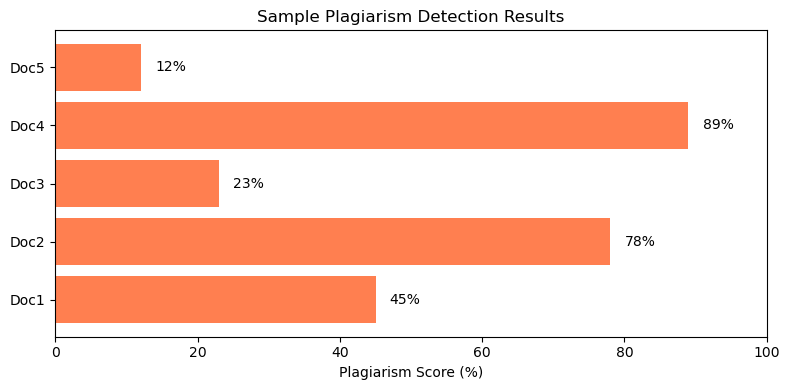

✅ Matplotlib working correctly!
🎉 DAY 1 COMPLETION SUMMARY

✅ Completed Tasks:
   1. Jupyter Notebook environment set up
   2. All required libraries installed
   3. NLTK data downloaded
   4. Project structure created
   5. Test files generated
   6. Basic NLP operations tested
   7. Visualization working

📊 Environment Stats:
   • Python: 3.13.5
   • NumPy: 2.1.3
   • Pandas: 2.2.3
   • Working Directory: C:\Users\hp\PlagiaGuard\notebooks

📝 Next Steps (Day 2):
   1. Create File Handler notebook
   2. Implement text preprocessing
   3. Build similarity calculator
   4. Test with sample documents

🚀 READY FOR DAY 2!


In [5]:
# ============================================================
# NOTEBOOK 1: Setup and Testing
# PlagiaGuard - Day 1
# ============================================================

# %% [markdown]
# # 📋 Day 1: Environment Setup & Verification
# 
# **Objectives:**
# - Verify all libraries are installed
# - Test basic functionality
# - Set up file handling
# 
# **Team:** Rahul Singh, Ketan Saini, Sajal Rathore

# %% [markdown]
# ## 1️⃣ Import All Required Libraries

# %%
# Standard Libraries
import os
import sys
from pathlib import Path

# Data Handling
import numpy as np
import pandas as pd

# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

# Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# File Handling
import PyPDF2
from docx import Document

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Progress Bars
from tqdm.notebook import tqdm

# Display settings
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")

# %% [markdown]
# ## 2️⃣ Verify Installation

# %%
def verify_setup():
    """Verify all components are installed correctly"""
    
    print("=" * 60)
    print("🔍 VERIFYING SETUP")
    print("=" * 60)
    
    # Check Python version
    print(f"\n✅ Python Version: {sys.version.split()[0]}")
    
    # Check key libraries
    libraries = {
        'NumPy': np.__version__,
        'Pandas': pd.__version__,
        'NLTK': nltk.__version__,
    }
    
    print("\n📦 Library Versions:")
    for name, version in libraries.items():
        print(f"   ✅ {name}: {version}")
    
    # Check NLTK data
    print("\n📚 NLTK Data:")
    try:
        stopwords.words('english')
        print("   ✅ Stopwords downloaded")
    except:
        print("   ❌ Stopwords missing - run: nltk.download('stopwords')")
    
    try:
        word_tokenize("test")
        print("   ✅ Punkt tokenizer downloaded")
    except:
        print("   ❌ Punkt missing - run: nltk.download('punkt')")
    
    # Check folder structure
    print("\n📁 Project Structure:")
    folders = ['data', 'notebooks', 'src', 'reports']
    for folder in folders:
        status = "✅" if os.path.exists(f"../{folder}") else "❌"
        print(f"   {status} {folder}/")
    
    print("\n" + "=" * 60)
    print("✨ SETUP VERIFICATION COMPLETE!")
    print("=" * 60)

# Run verification
verify_setup()

# %% [markdown]
# ## 3️⃣ Download NLTK Data (Run Once)

# %%
# Download required NLTK data
def download_nltk_data():
    """Download all required NLTK data"""
    
    datasets = ['punkt', 'stopwords', 'wordnet', 'averaged_perceptron_tagger']
    
    print("📥 Downloading NLTK data...\n")
    for dataset in tqdm(datasets, desc="Downloading"):
        try:
            nltk.download(dataset, quiet=True)
            print(f"✅ {dataset}")
        except Exception as e:
            print(f"❌ {dataset}: {e}")
    
    print("\n✅ NLTK data download complete!")

# Uncomment to download (run only once)
# download_nltk_data()

# %% [markdown]
# ## 4️⃣ Test Basic NLP Operations

# %%
# Test text processing
sample_text = """
Artificial intelligence is transforming the world. 
Machine learning algorithms can now perform tasks that 
were once thought to require human intelligence.
"""

print("📝 Sample Text:")
print(sample_text)

# Tokenization
words = word_tokenize(sample_text)
print(f"\n🔤 Tokens: {len(words)} words")
print(f"First 5 tokens: {words[:5]}")

# Sentences
sentences = sent_tokenize(sample_text)
print(f"\n📄 Sentences: {len(sentences)}")

# Stop words
stop_words = set(stopwords.words('english'))
filtered_words = [w for w in words if w.lower() not in stop_words and w.isalnum()]
print(f"\n🚫 After removing stop words: {len(filtered_words)} words")
print(f"Filtered: {filtered_words[:10]}")

# %% [markdown]
# ## 5️⃣ Create Sample Test Files

# %%
# Create test files for our project
def create_test_files():
    """Create sample documents for testing"""
    
    # Create directory
    test_dir = Path("../data/test_docs")
    test_dir.mkdir(parents=True, exist_ok=True)
    
    # Sample documents
    documents = {
        "sample1.txt": """
        Artificial intelligence is transforming the world. Machine learning 
        algorithms can now perform tasks that were once thought to require 
        human intelligence. Deep learning, a subset of machine learning, 
        has achieved remarkable results in image recognition and natural 
        language processing.
        """,
        
        "sample2.txt": """
        AI is revolutionizing our society. ML models are capable of 
        completing activities previously requiring human cognition. 
        Neural networks, a type of ML, have shown impressive performance 
        in computer vision and text analysis.
        """,
        
        "original.txt": """
        Climate change is one of the most pressing issues of our time. 
        Rising global temperatures are causing glaciers to melt and sea 
        levels to rise. Immediate action is needed to reduce greenhouse 
        gas emissions and protect our planet for future generations.
        """
    }
    
    # Write files
    for filename, content in documents.items():
        filepath = test_dir / filename
        with open(filepath, 'w', encoding='utf-8') as f:
            f.write(content.strip())
        print(f"✅ Created: {filename}")
    
    print(f"\n📁 Test files saved in: {test_dir}")
    return test_dir

# Create test files
test_dir = create_test_files()

# %% [markdown]
# ## 6️⃣ Quick Visualization Test

# %%
# Test matplotlib
fig, ax = plt.subplots(figsize=(8, 4))
sample_scores = [45, 78, 23, 89, 12]
sample_labels = ['Doc1', 'Doc2', 'Doc3', 'Doc4', 'Doc5']

ax.barh(sample_labels, sample_scores, color='coral')
ax.set_xlabel('Plagiarism Score (%)')
ax.set_title('Sample Plagiarism Detection Results')
ax.set_xlim(0, 100)

for i, v in enumerate(sample_scores):
    ax.text(v + 2, i, f'{v}%', va='center')

plt.tight_layout()
plt.show()

print("✅ Matplotlib working correctly!")

# %% [markdown]
# ## 7️⃣ System Summary

# %%
def print_summary():
    """Print day 1 completion summary"""
    
    print("=" * 60)
    print("🎉 DAY 1 COMPLETION SUMMARY")
    print("=" * 60)
    
    print("\n✅ Completed Tasks:")
    tasks = [
        "Jupyter Notebook environment set up",
        "All required libraries installed",
        "NLTK data downloaded",
        "Project structure created",
        "Test files generated",
        "Basic NLP operations tested",
        "Visualization working"
    ]
    
    for i, task in enumerate(tasks, 1):
        print(f"   {i}. {task}")
    
    print("\n📊 Environment Stats:")
    print(f"   • Python: {sys.version.split()[0]}")
    print(f"   • NumPy: {np.__version__}")
    print(f"   • Pandas: {pd.__version__}")
    print(f"   • Working Directory: {os.getcwd()}")
    
    print("\n📝 Next Steps (Day 2):")
    next_steps = [
        "Create File Handler notebook",
        "Implement text preprocessing",
        "Build similarity calculator",
        "Test with sample documents"
    ]
    
    for i, step in enumerate(next_steps, 1):
        print(f"   {i}. {step}")
    
    print("\n" + "=" * 60)
    print("🚀 READY FOR DAY 2!")
    print("=" * 60)

print_summary()

# %% [markdown]
# ---
# ## 💾 Save This Notebook
# 
# **File → Save and Checkpoint** or press `Ctrl+S`
# 
# ## 🎯 Checkpoint
# 
# Before moving to the next notebook, make sure:
# - [ ] All cells run without errors
# - [ ] Test files are created in `data/test_docs/`
# - [ ] Visualizations display correctly
# - [ ] Summary shows all tasks completed
# 
# **Status:** ✅ Day 1 Complete!